 #bovine population
fuente_1 = "https://ec.europa.eu/eurostat/databrowser/view/APRO_MT_LSCATL/default/table?lang=en", "Bovine population"

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url1 = "data/estat_apro_mt_lscatl$defaultview_filtered_en.csv"
df_1 = pd.read_csv(url1)
df_1.rename(columns={"TIME_PERIOD":"AÑO", "geo": "PAIS"}, inplace=True)

In [4]:
df_1.drop(columns=['DATAFLOW', 'LAST UPDATE', "freq", "unit", "month", "OBS_FLAG", "animals"], inplace=True)

In [5]:
df_bovine = pd.pivot_table(df_1, values='OBS_VALUE', index='AÑO', columns='PAIS', aggfunc='sum')

df_bovine.columns

Index(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'European Union - 15 countries (1995-2004)',
       'European Union - 25 countries (2004-2006)',
       'European Union - 27 countries (2007-2013)',
       'European Union - 27 countries (from 2020)',
       'European Union - 28 countries (2013-2020)', 'Finland', 'France',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy',
       'Kosovo (under United Nations Security Council Resolution 1244/99)',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro',
       'Netherlands', 'North Macedonia', 'Poland', 'Portugal', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom'],
      dtype='object', name='PAIS')

In [6]:
#Eliminamos variables que no nos interesan.
df_bovine.drop(columns=['European Union - 15 countries (1995-2004)', 'European Union - 25 countries (2004-2006)', "Kosovo (under United Nations Security Council Resolution 1244/99)"], inplace=True)


In [7]:
df_bovine.drop(columns=['European Union - 27 countries (from 2020)', 'European Union - 28 countries (2013-2020)'], inplace=True)

In [8]:
df_bovine.drop(columns=['European Union - 27 countries (2007-2013)'], inplace=True)

In [9]:
df_bovine

PAIS,Albania,Austria,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,...,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom
AÑO,,,,,,,,,,,,,,,,,,,,,
2013,NaN,3646.77,4366.46,704.0,947.31,824.0,108.35,2412.66,2958.0,456.40,...,2532.25,3168.3,1631.00,830.41,871.24,10672.86,2724.02,NaN,25430.67,17699.0
2014,651.92,3652.46,4456.90,699.0,869.00,793.0,113.46,2509.49,2928.0,464.80,...,2736.90,3248.2,1632.00,817.74,885.84,11428.54,2717.73,NaN,24803.88,17709.0
2015,661.33,3645.65,4493.73,725.0,842.65,825.0,109.82,2482.44,2944.0,449.40,...,2865.76,3303.0,1636.00,808.75,918.60,11618.57,2704.98,2829.33,24558.26,18122.0
2016,649.85,3650.73,4489.87,729.0,872.72,841.0,116.42,2428.72,2933.0,434.10,...,2900.01,3194.1,1585.00,791.46,929.48,11928.79,2715.97,2824.53,24977.08,18145.0
2017,604.95,3629.11,4269.74,708.0,829.12,863.0,124.59,2478.99,2934.0,440.30,...,2955.17,3124.3,1601.00,773.78,914.56,12272.08,2738.07,2824.88,28893.98,18112.0
2018,595.62,3577.63,4310.43,700.0,817.16,816.0,130.56,2476.76,2882.0,442.30,...,2862.46,3053.8,1514.00,768.64,910.97,12345.57,2713.41,2789.98,30771.74,17753.0
2019,518.04,3516.60,4280.58,690.0,785.09,829.0,134.41,2487.89,2823.0,445.60,...,2977.63,2947.3,1568.00,760.09,920.63,12515.04,2649.75,2772.11,31894.19,17514.0
2020,435.53,3467.03,4220.07,686.0,883.50,826.0,150.34,2444.78,2826.0,446.90,...,2999.47,2838.1,1547.00,781.46,925.12,12571.77,2643.21,2766.51,32055.55,NaN
2021,395.64,3513.20,4190.31,NaN,920.94,847.0,153.33,2472.34,2792.0,439.30,...,2910.19,2742.9,1494.00,765.23,926.51,12231.60,2644.21,2800.82,31822.81,NaN


Una vez creado el df y haberlo limpiado, hacemos una primera grafica y podemos observar una clara diferenciación entre dos grupos de paises. Decimos por ello crear dos sub grupos, los que más cantidad de población bobina y los que menos.

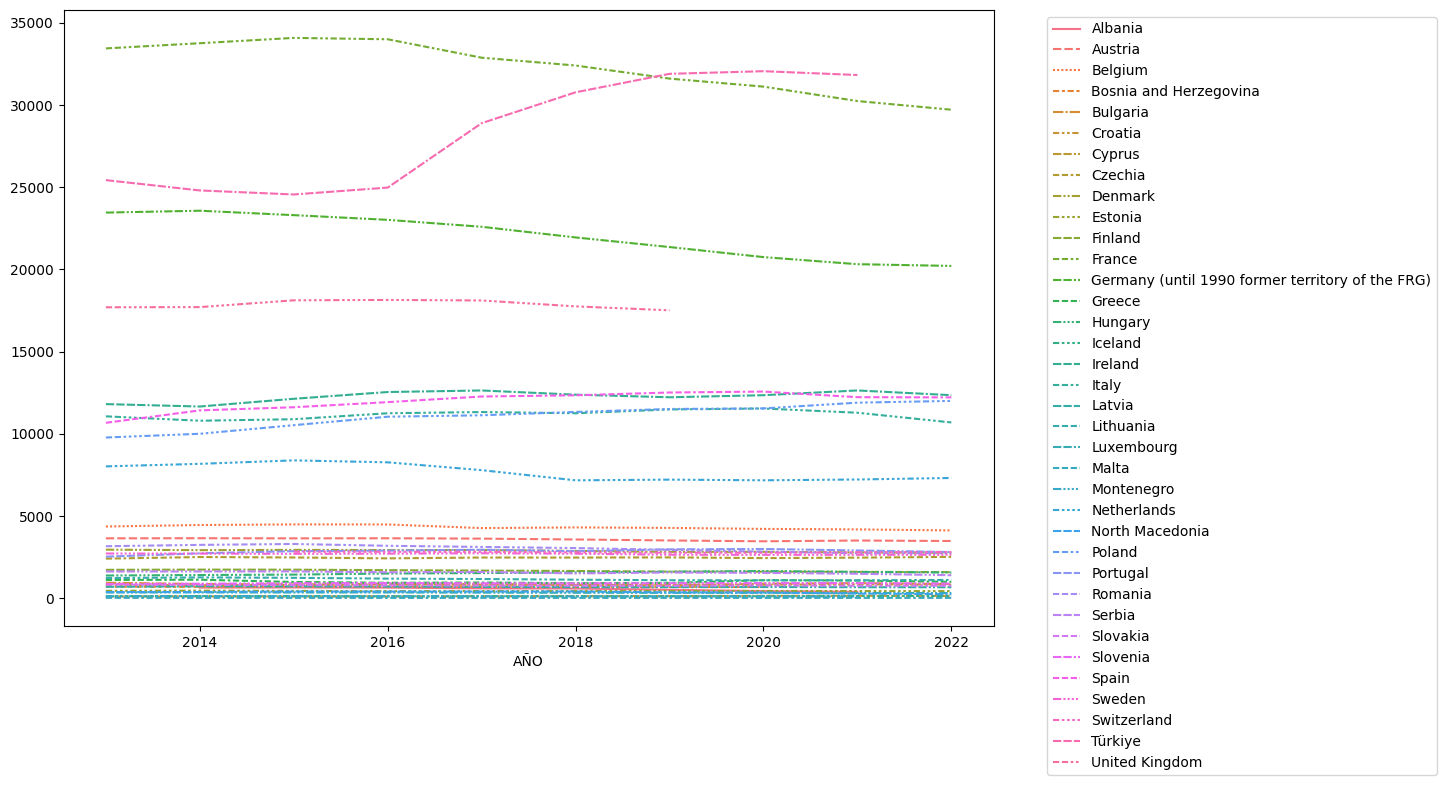

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(data = df_bovine)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [11]:
pobBAJA = df_bovine[["Albania", "Bosnia and Herzegovina", "Czechia", "Denmark",	"Finland", "Slovenia", "Slovakia", "Greece", "Hungary", "Bulgaria", "Croatia", "Cyprus", "Estonia", "Iceland", "Latvia", "Luxembourg", "Malta", "Montenegro", "North Macedonia", "Serbia"]].copy()

In [12]:
pobBAJA.columns

Index(['Albania', 'Bosnia and Herzegovina', 'Czechia', 'Denmark', 'Finland',
       'Slovenia', 'Slovakia', 'Greece', 'Hungary', 'Bulgaria', 'Croatia',
       'Cyprus', 'Estonia', 'Iceland', 'Latvia', 'Luxembourg', 'Malta',
       'Montenegro', 'North Macedonia', 'Serbia'],
      dtype='object', name='PAIS')

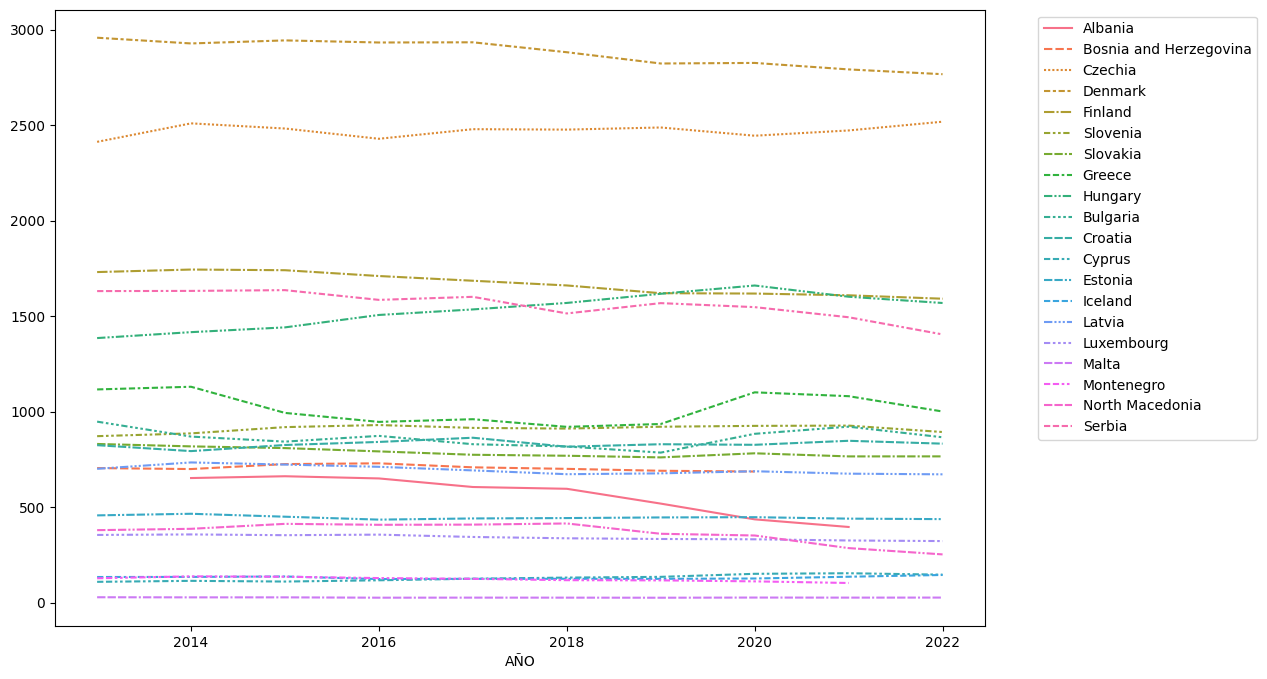

In [13]:
plt.figure(figsize=(12,8))
sns.lineplot(data = pobBAJA)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [14]:
pobALTA= df_bovine.copy()
pobALTA.drop(columns = ["Albania", "Bosnia and Herzegovina", "Czechia", "Denmark",	"Finland", "Slovenia", "Slovakia", "Greece", "Hungary", "Bulgaria", "Croatia", "Cyprus", "Estonia", "Iceland", "Latvia", "Luxembourg", "Malta", "Montenegro", "North Macedonia", "Serbia"], inplace=True)
pobALTA.columns

Index(['Austria', 'Belgium', 'France',
       'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Italy',
       'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain',
       'Sweden', 'Switzerland', 'Türkiye', 'United Kingdom'],
      dtype='object', name='PAIS')

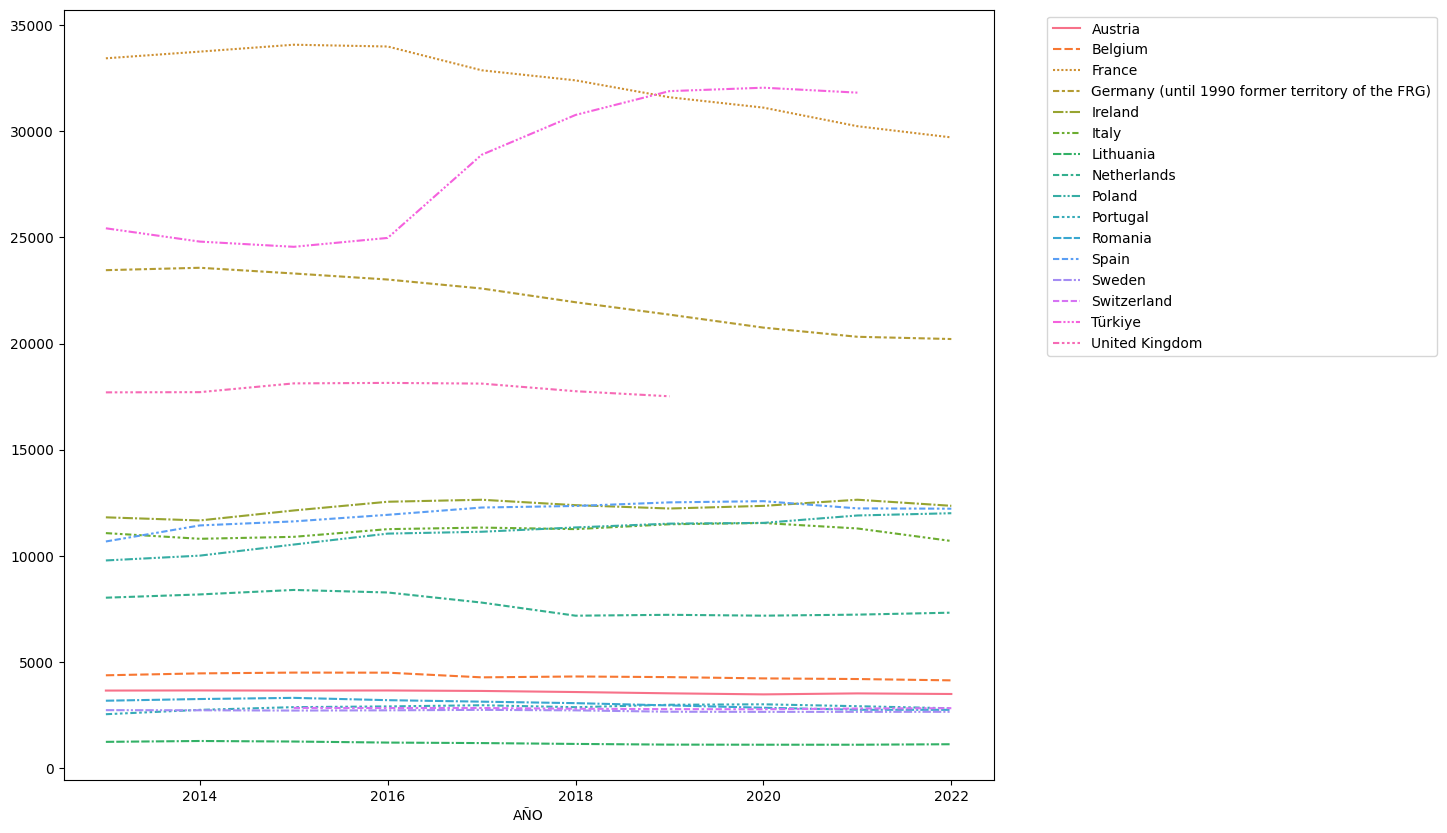

In [15]:
plt.figure(figsize=(12,10))
sns.lineplot(data = pobALTA)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

Debido a la salida de Uk de la UE no tenemos datos a partir de 2019, pero decidimos mantenerlo en el dataset igualmente y contrastar sus emisiones hasta dicha fecha.